In [3]:

import os
import zipfile

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
source_zip_path = '/content/drive/MyDrive/team14-20230919T065414Z-001.zip'
destination_folder = '/content/data'

os.makedirs(destination_folder, exist_ok=True)
with zipfile.ZipFile(source_zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path_folder='/content/data/team14/'
train_path_10=path_folder + 'Train-14-Sample-1.csv'
train_path_100=path_folder + 'Train-14-Sample-2.csv'

val_path=path_folder + 'Val-14.csv'
test_path=path_folder + 'Test-14.csv'

data = pd.read_csv(train_path_100)

In [7]:
train_100 = np.genfromtxt(train_path_100, delimiter=',',skip_header=1, dtype=np.float32)
train_10 = np.genfromtxt(train_path_10, delimiter=',',skip_header=1, dtype=np.float32)
# for i in range(len(train_100[:,0])):
#   for j in range(i+1 , len(train_100[:,0])):
#     if train_100[i,1]> train_100[j,1]:
#       c = train_100[j,:]
#       train_100[j,:] = train_100[i,:]
#       train_100[i,:] = c
  # print(train_100[i,:])
# sorted_matrix = sorted(train_100, key=lambda x: x[1])

# Get the indices that would sort the matrix based on the second column (index 1)
sorted_indices = np.argsort(train_100[:, 1])

# Use the sorted indices to rearrange the rows of the matrix
sorted_matrix = train_100[sorted_indices]

# Print the sorted matrix
# print(sorted_matrix)
train_100 = sorted_matrix
# train_100 = sorted_matrix
X_train_100=train_100[:,1:-1]
y_train_100=train_100[:,-1]
X_train_10=train_10[:,1:-1]
y_train_10=train_10[:,-1]

val_data = np.genfromtxt(val_path, delimiter=',',skip_header=1, dtype=np.float32)
test_data = np.genfromtxt(test_path, delimiter=',',skip_header=1, dtype=np.float32)

sorted_indices = np.argsort(val_data[:, 1])
sorted_matrix = val_data[sorted_indices]
val_data = sorted_matrix

sorted_indices = np.argsort(test_data[:, 1])
sorted_matrix = test_data[sorted_indices]
test_data = sorted_matrix

X_val=val_data[:,1:-1]
y_val=val_data[:,-1]
X_test=test_data[:,1:-1]
y_test=test_data[:,-1]
# print(sorted_matrix)

In [8]:
# X_train_100.shape
# train_100.shape
# print(train_100)
# for i in range(1,6):
#   print(i)
# len(train_100[:,0])

In [9]:
# def aij(i, j, x):
#   sum = 0
#   for xn in x[:,1]:
#     sum = sum + xn**(i*j)
#   return sum

# def cj(j, x, t):
#   sum = 0
#   n = len(x[:,1])
#   i = 0
#   while i < n:
#     sum = sum + t[i,1]*x[i,1]**(j)
#     i = i+1
#   return sum

In [10]:
# i = 0
# j = 0
# while i < int(m):
#   C[i,1] = cj(i, x_train_10, y_train_10)
#   print(i)
#   while j < m:
#     A[i,j] = aij(i, j, x_train_10)
#     j = j+1
#   i = i+1

In [8]:
def basis(x, m):
  i = 0
  N= x.shape[0]
  Q= np.empty((N,m+1))
  for i in range(m+1):
    Q[:,i] = (x**i).reshape(N)
  return Q

In [9]:
def pseudo_inverse(Q):
  A = np.matmul(Q.T,Q)
  return np.matmul(np.linalg.pinv(A),Q.T)


def lam_pseudo_inverse(Q,l,m):
  L = l*np.identity(m+1, dtype = float)
  A = np.matmul(Q.T,Q)
  return np.matmul(np.linalg.pinv(A+L),Q.T)

In [10]:
def curve_fitting(x,y,m):
  w = np.matmul(pseudo_inverse(basis(x,m)),y)
  return w

def lam_curve_fitting(x,y,m,l):
  w = np.matmul(lam_pseudo_inverse(basis(x,m),l,m),y)
  return w

In [11]:
def err(X,y,m,w):
  N = len(y)
  Y = np.matmul(basis(X,m),w.T)
  t = Y - y
  return (np.dot(t,t)/N)**0.5

In [12]:
# m= np.array([2,3,6,9])

In [59]:
m = 2
l = [0,1e-5,0.1,11.52,156]


In [39]:
# fig= plt.figure()
# i=0
# for deg in m:
#   i=i+1
#   ax= fig.add_subplot(2,2,i)
#   w = curve_fitting(X_train_10,y_train_10,deg)
#   plt.scatter(X_train_10,y_train_10)
#   plt.plot(X_train_10,np.matmul(basis(X_train_10,deg),w.T))

In [40]:
# fig = plt.figure()
# w = curve_fitting(X_train_10,y_train_10,m)
# plt.scatter(X_train_10,y_train_10)
# plt.plot(X_train_10,np.matmul(basis(X_train_10,m),w.T),'r')
# plt.title('Polynomial Curve Fitting m = %i,  ' % m + '$\lambda$ = %1.6f'% l + '\n10 training data points')
# plt.xlabel('X_data')
# plt.ylabel('Model_Output_Ym')
# plt.legend(['Data','Training Model Output Curve'])
# plt.show()

In [49]:
w = lam_curve_fitting(X_train_100,y_train_100,m,l[99])

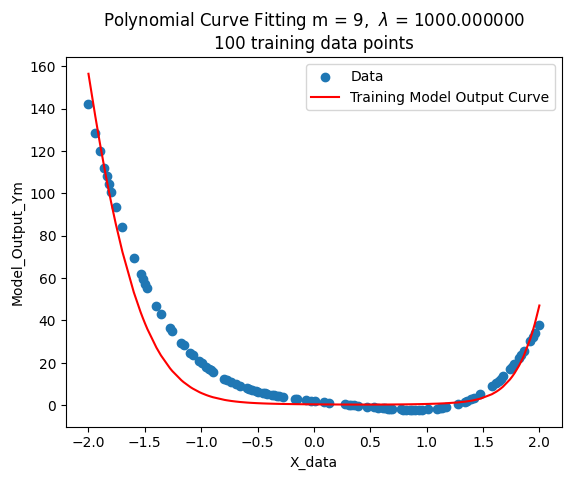

In [50]:
plt.scatter(X_train_100,y_train_100)
plt.plot(X_train_100,np.matmul(basis(X_train_100,m),w.T),'r')
plt.title('Polynomial Curve Fitting m = %i,  ' % m + '$\lambda$ = %1.6f'% l[99] + '\n100 training data points')
plt.xlabel('X_data')
plt.ylabel('Model_Output_Ym')
plt.legend(['Data','Training Model Output Curve'])

In [60]:
er_train = []
er_val = []
er_test = []
for i in l:
  w = lam_curve_fitting(X_train_10,y_train_10,m,i)
  er_train.append(err(X_train_10,y_train_10,m,w))
  er_val.append(err(X_val,y_val,m,w))
  er_test.append(err(X_test,y_test,m,w))

In [63]:
print( np.array(er_train).T)


[11.05514657 11.05514657 11.05900258 18.50602344 41.76083688]


In [43]:
# Define a sample matrix (list of lists)
matrix = [
    [3, 2, 5],
    [1, 4, 6],
    [7, 0, 8]
]

# Sort the matrix based on the second column (index 1)
sorted_matrix = sorted(matrix, key=lambda x: x[1])

# Print the sorted matrix
for row in sorted_matrix:
    print(row)

[7, 0, 8]
[3, 2, 5]
[1, 4, 6]


In [ ]:
import numpy as np

# Define a sample matrix as a NumPy array
matrix = np.array([
    [3, 2, 5],
    [1, 4, 6],
    [7, 0, 8]
])

# Get the indices that would sort the matrix based on the second column (index 1)
sorted_indices = np.argsort(matrix[:, 1])

# Use the sorted indices to rearrange the rows of the matrix
sorted_matrix = matrix[sorted_indices]

# Print the sorted matrix
print(sorted_matrix)